In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salikhussaini49/prediction-of-sepsis")

print("Path to dataset files:", path)


c:\Users\48591347\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 74.7M/74.7M [00:31<00:00, 2.52MB/s]

Extracting files...


Path to dataset files: C:\Users\48591347\.cache\kagglehub\datasets\salikhussaini49\prediction-of-sepsis\versions\2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00


In [7]:
import kagglehub
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("salikhussaini49/prediction-of-sepsis")

path


import os

# Mostrar los archivos que hay en la carpeta descargada
#print(os.listdir(path))
df = pd.read_csv(path + "/Dataset.csv")
print(df.shape)
df.head()



Matplotlib is building the font cache; this may take a moment.


(1552210, 44)


,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [ ]:
df.info().sort_values("Non-Null Count")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Hour              1552210 non-null  int64  
 1   HR                1398811 non-null  float64
 2   O2Sat             1349474 non-null  float64
 3   Temp              525226 non-null   float64
 4   SBP               1325945 non-null  float64
 5   MAP               1358940 non-null  float64
 6   DBP               1065656 non-null  float64
 7   Resp              1313875 non-null  float64
 8   EtCO2             57636 non-null    float64
 9   BaseExcess        84145 non-null    float64
 10  HCO3              65028 non-null    float64
 11  FiO2              129365 non-null   float64
 12  pH                107573 non-null   float64
 13  PaCO2             86301 non-null    float64
 14  SaO2              53561 non-null    float64
 15  AST               25183 non-null    float64
 16  

AttributeError: 'NoneType' object has no attribute 'sort_values'

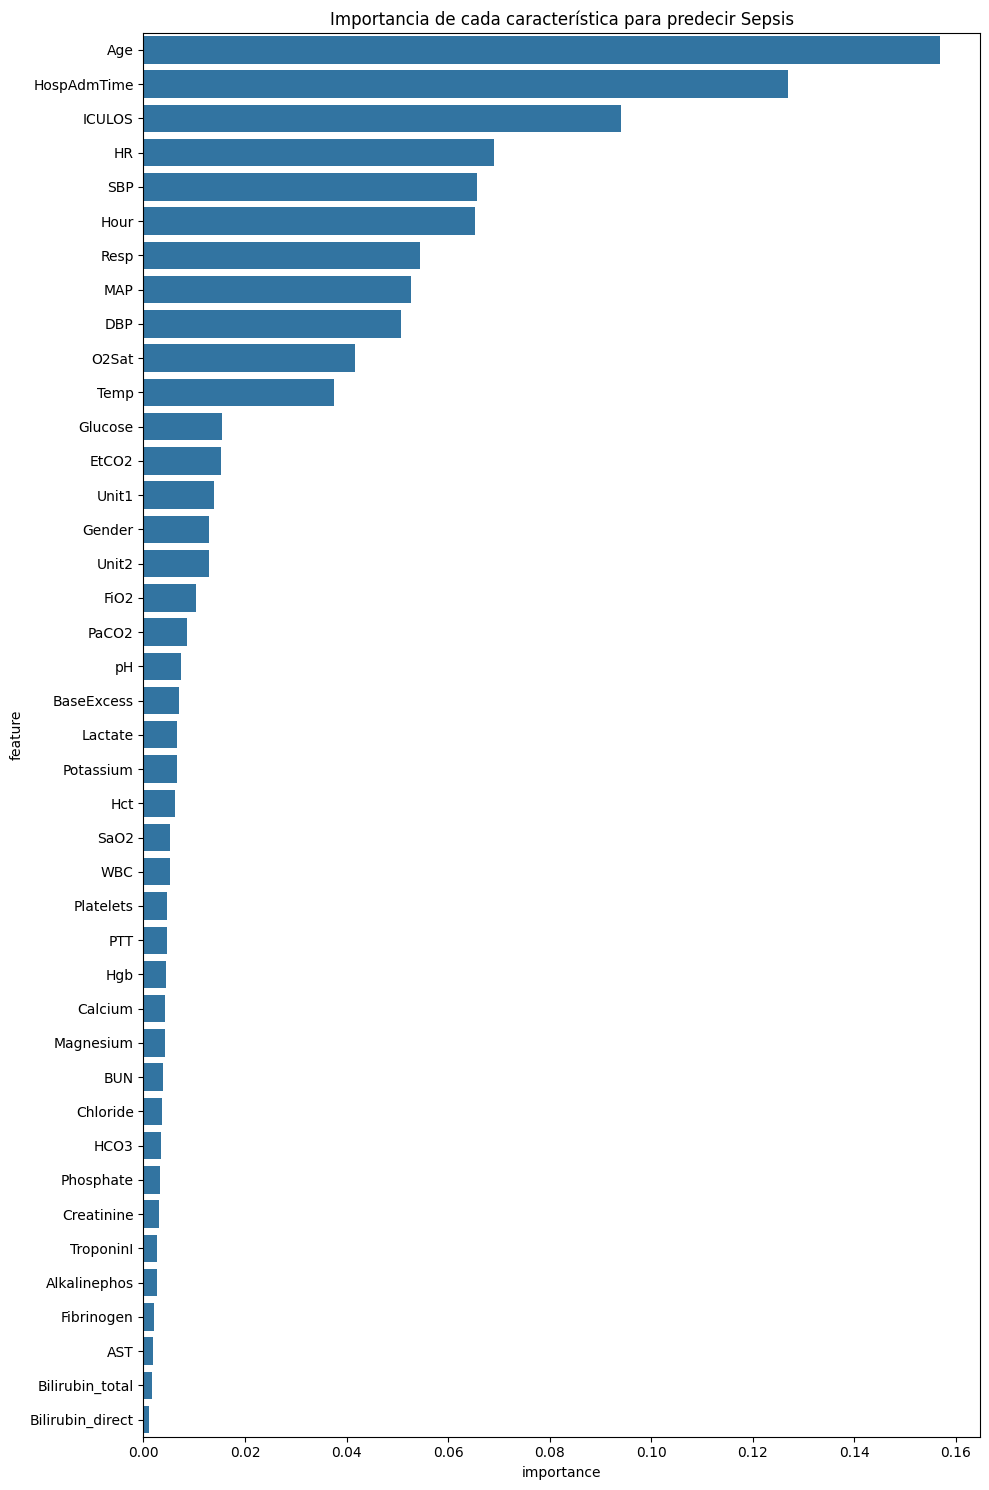

             feature  importance
35               Age    0.156917
39       HospAdmTime    0.126858
40            ICULOS    0.093966
1                 HR    0.069030
4                SBP    0.065626
0               Hour    0.065277
7               Resp    0.054493
5                MAP    0.052708
6                DBP    0.050763
2              O2Sat    0.041583
3               Temp    0.037535
22           Glucose    0.015394
8              EtCO2    0.015373
37             Unit1    0.013887
36            Gender    0.012948
38             Unit2    0.012879
11              FiO2    0.010260
13             PaCO2    0.008513
12                pH    0.007473
9         BaseExcess    0.007046
23           Lactate    0.006652
26         Potassium    0.006650
29               Hct    0.006300
14              SaO2    0.005276
32               WBC    0.005273
34         Platelets    0.004689
31               PTT    0.004556
30               Hgb    0.004375
18           Calcium    0.004295
24        

In [ ]:


# Cargar los datos
#df = pd.read_csv("sepsis_dataset.csv")

# Eliminar columnas que no aportan 
from sklearn.metrics import accuracy_score, roc_auc_score

columnas_a_quitar = ["Unnamed: 0", "Patient_ID"]
df = df.drop(columns=columnas_a_quitar)

# Separar variables para predecir del resto
X = df.drop("SepsisLabel", axis=1)
y = df["SepsisLabel"]

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Separar datos train y test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Importancia de features
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Mostrar gráfico de importancias
plt.figure(figsize=(10, 15))
sns.barplot(y="feature", x="importance", data=feature_importance)
plt.title("Importancia de cada característica para predecir Sepsis")
plt.tight_layout()
plt.show()


print(feature_importance)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)

In [ ]:
# for i in range(len(feature_importance)):
#   if feature_importance[2][i] >= 0.02:
#     df.iloc[:, [i]].info()
#   else:
#     break


# Intento de hacer laog queno salio comparando la cantidad de datos y su importantica 


# for i in range(len(feature_importance)):
#   if feature_importance["importance"][i] >= 0.02:
#     more_important = df.iloc[:, i].info()  # Guardar la información si lo necesitas
#     print( df.iloc[:, i].info())
#     df.notnull(more_important)


#   else:
#     break


#Mas intentos de lo mismo



# non_null_list=[]
# # Contar non-null por columna
# for i in range(len(df.notnull().sum())):
#   df.notnull.append
# print(non_null_list)
# non_null_counts = df.notnull().sum()

# sorted_cols = non_null_counts.sort_values(ascending=False).index

# # Mostrar el resultado ordenado
# print(non_null_counts.sort_values(ascending=False))

<class 'pandas.core.series.Series'>
RangeIndex: 1552210 entries, 0 to 1552209
Series name: Hour
Non-Null Count    Dtype
--------------    -----
1552210 non-null  int64
dtypes: int64(1)
memory usage: 11.8 MB
<class 'pandas.core.series.Series'>
RangeIndex: 1552210 entries, 0 to 1552209
Series name: Hour
Non-Null Count    Dtype
--------------    -----
1552210 non-null  int64
dtypes: int64(1)
memory usage: 11.8 MB
None


TypeError: DataFrame.notnull() takes 1 positional argument but 2 were given

In [ ]:
df.iloc[:, [1]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   HR      1398811 non-null  float64
dtypes: float64(1)
memory usage: 11.8 MB


AttributeError: 'function' object has no attribute 'append'

In [ ]:
# 1. Obtener la cantidad de datos non-null por columna (en el df original)
non_null_counts = df.notnull().sum()

# 2. Unir esa info con la importancia de características
# feature_importance ya tiene columnas "feature" e "importance"

# 3. Crear la lista de listas
lista_resultado = []

for feature in feature_importance["feature"]:
    cantidad_non_null = non_null_counts[feature]
    importancia = feature_importance.loc[feature_importance["feature"] == feature, "importance"].values[0]
    lista_resultado.append([feature, cantidad_non_null, importancia])

# for fila in lista_resultado:
#     print(fila)
tabla_resultado = pd.DataFrame(lista_resultado, columns=["Feature", "Non-Null Count", "Importance"])

# Mostrar como tabla
print(tabla_resultado)

             Feature  Non-Null Count  Importance
0                Age         1552210    0.156917
1        HospAdmTime         1552202    0.126858
2             ICULOS         1552210    0.093966
3                 HR         1398811    0.069030
4                SBP         1325945    0.065626
5               Hour         1552210    0.065277
6               Resp         1313875    0.054493
7                MAP         1358940    0.052708
8                DBP         1065656    0.050763
9              O2Sat         1349474    0.041583
10              Temp          525226    0.037535
11           Glucose          265516    0.015394
12             EtCO2           57636    0.015373
13             Unit1          940250    0.013887
14            Gender         1552210    0.012948
15             Unit2          940250    0.012879
16              FiO2          129365    0.010260
17             PaCO2           86301    0.008513
18                pH          107573    0.007473
19        BaseExcess